In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples = 1000,centers = 3,n_features = 2,random_state = 23)

In [3]:
x.shape

(1000, 2)

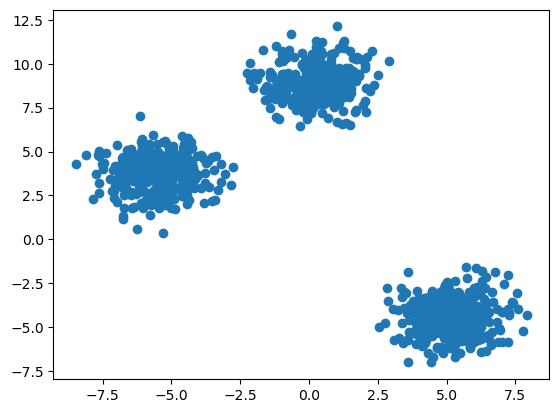

In [4]:
plt.scatter(x[:,0],x[:,1])
plt.show()

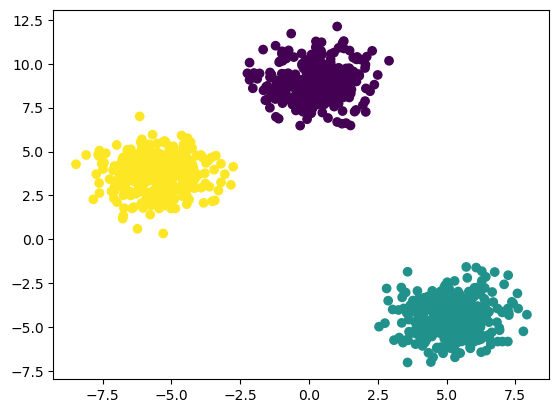

In [5]:
# Our output will be this
plt.scatter(x[:,0],x[:,1],c = y)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [7]:
from sklearn.cluster import KMeans

In [8]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

In [9]:
wcss

[34827.57682552021,
 7935.437286145416,
 1319.2730531585607,
 1185.774391042412,
 1002.6899356032387,
 893.0633120916282,
 779.2822206189879,
 679.6325456245947,
 646.0955950708171,
 575.7426188266969]

In [10]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

kl.elbow
# If our wcss value will be "increases" then we use "concave"
# If our wcss value will be "decreases" then we use "convex"

3

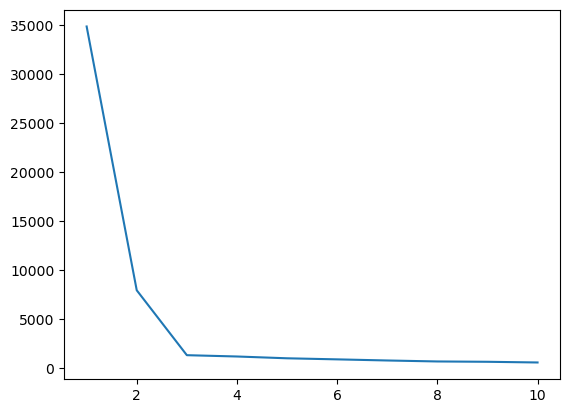

In [11]:
plt.plot(range(1,11),wcss)

In [12]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [13]:
y_labels = kmeans.fit_predict(x_train)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


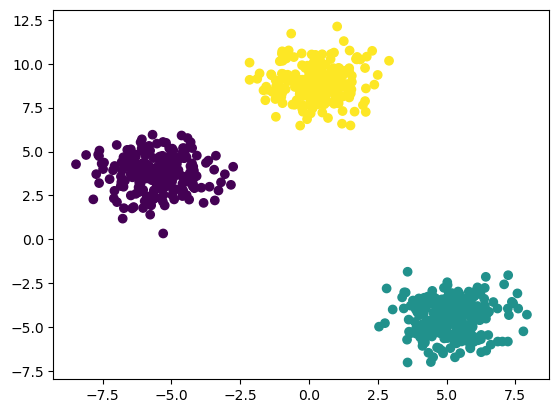

In [14]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_labels)

In [15]:
# Performance metrics
# Silhoutte score
from sklearn.metrics import silhouette_score

In [16]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = 3, init = "k-means++")
    kmeans.fit(x_train)
    score = silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Krishna Baraskar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMe

In [17]:
max(silhouette_coefficients)

0.8071181203797672

**At the 3 our silhoutte coefficients is 80% and it's high.**

### **Testing the model**

In [18]:
y_t_label = kmeans.predict(x_test)

In [19]:
y_t_label

array([0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1,
       1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0,
       0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0,

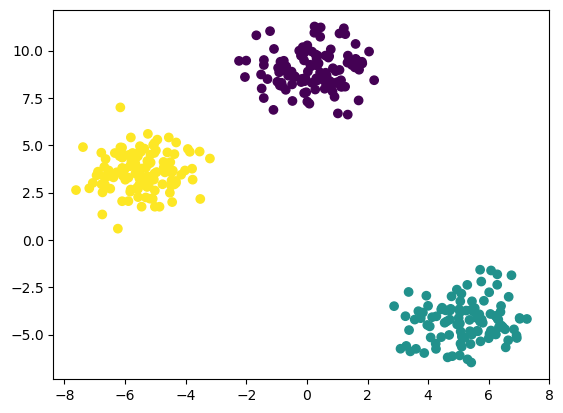

In [20]:
plt.scatter(x_test[:,0],x_test[:,1],c = y_t_label)
plt.show()